In [62]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load and Display Data

In [63]:
df = pd.read_csv('covid_19_country_wise_latest.csv')
print(df.head())

   Unnamed: 0 Country/Region  Confirmed Deaths  Recovered  Active  New cases  \
0           0    Afghanistan      36263   1269      25198    9796      106.0   
1           1        Albania       4880    144       2745    1991      117.0   
2           2        Algeria      27973   1163      18837    7973      616.0   
3           3        Andorra        907     52        803      52       10.0   
4           4         Angola        950     41        242     667       18.0   

   New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0        10.0             18                3.50                  69.49   
1         6.0             63                2.95                  56.25   
2         8.0            749                4.16                  67.34   
3         0.0              0                5.73                  88.53   
4         1.0              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0  

## 2. Set the Dataset index

In [64]:
df.set_index('Unnamed: 0', inplace=True)

## 3. Rename the index column

In [65]:
df.index.name = 'index'

## 4. Function to replace whitespace with underscores in column names

In [66]:
def clean_column_names(dataframe):
    dataframe.columns = dataframe.columns.str.replace(' ', '_')
    return dataframe

df = clean_column_names(df)

## 5. Check Basic Information

In [67]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    object 
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New_cases               177 non-null    float64
 6   New_deaths              177 non-null    float64
 7   New_recovered           187 non-null    int64  
 8   Deaths_/_100_Cases      187 non-null    float64
 9   Recovered_/_100_Cases   187 non-null    float64
 10  Deaths_/_100_Recovered  187 non-null    float64
 11  Confirmed_last_week     187 non-null    int64  
 12  1_week_change           187 non-null    int64  
 13  1_week_%_increase       187 non-null    float64
 14  WHO_Region              187 non-null    object 

## 6. Fill NaN values with the mean of the column (only for numeric columns)

In [68]:
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

## 7. Count unique countries

In [69]:
unique_countries = df['Country/Region'].nunique()
print(f"Unique countries: {unique_countries}")

Unique countries: 187


## 8. Check and remove duplicate country entries

In [70]:
df.drop_duplicates(subset=['Country/Region'], keep='first', inplace=True)

## 9. Statistics of Total Cases

In [71]:
print(f"Mean: {df['Confirmed'].mean()}")
print(f"Median: {df['Confirmed'].median()}")
print(f"Standard Deviation: {df['Confirmed'].std()}")

Mean: 88130.935828877
Median: 5059.0
Standard Deviation: 383318.6638306154


## 10. Replace string values in Deaths column with its mean

In [72]:
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')
df['Deaths'].fillna(df['Deaths'].mean(), inplace=True)

C:\Users\Mehdi\AppData\Local\Temp\ipykernel_7096\1475531195.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Deaths'].fillna(df['Deaths'].mean(), inplace=True)


## 11. Change Deaths column datatype

In [73]:
df['Deaths'] = df['Deaths'].astype(float)

## 12. Total Deaths and Recoveries worldwide

In [74]:
total_deaths = df['Deaths'].sum()
total_recoveries = df['Recovered'].sum()
print(f"Total Deaths: {total_deaths}, Total Recoveries: {total_recoveries}")

Total Deaths: 657516.1290322581, Total Recoveries: 9468087


## 13. Countries with more than 1 million total cases

In [75]:
high_case_countries = df[df['Confirmed'] > 1_000_000]
print(high_case_countries[['Country/Region', 'Confirmed']])

      Country/Region  Confirmed
index                          
23            Brazil    2442375
79             India    1480073
173               US    4290259


## 14. Countries with a recovery rate above 95%

In [76]:
df['Recovery_Rate'] = (df['Recovered'] / df['Confirmed']) * 100
high_recovery_countries = df[df['Recovery_Rate'] > 95]
print(high_recovery_countries[['Country/Region', 'Recovery_Rate']])

      Country/Region  Recovery_Rate
index                              
24            Brunei      97.872340
48          Djibouti      98.379126
49          Dominica     100.000000
69           Grenada     100.000000
75          Holy See     100.000000
78           Iceland      98.327940
105         Malaysia      96.597035
110        Mauritius      96.511628
121      New Zealand      97.238279
126           Norway      95.838809
136            Qatar      97.017254
164          Taiwan*      95.238095


## 15. Drop WHO Region and Confirmed columns

In [77]:
df.drop(columns=['WHO_Region', 'Confirmed'], inplace=True)

## 16. Country with Max Deaths

In [78]:
max_deaths_country = df.loc[df['Deaths'].idxmax(), 'Country/Region']
print(f"Country with max deaths: {max_deaths_country}")

Country with max deaths: US


## 17. Sort Countries by Deaths in Descending Order

In [79]:
df_sorted_by_deaths = df.sort_values(by='Deaths', ascending=False)
print(df_sorted_by_deaths[['Country/Region', 'Deaths']].head())

       Country/Region    Deaths
index                          
173                US  148011.0
23             Brazil   87618.0
177    United Kingdom   45844.0
111            Mexico   44022.0
85              Italy   35112.0


## 18. Create Confirmed column

In [80]:
df['Confirmed'] = df['Deaths'] + df['Recovered'] + df['Active']

## 19. Calculate Death_Rate

In [81]:
df['Death_Rate'] = (df['Deaths'] / df['Confirmed']) * 100

## 20. Identify countries where cases are increasing but death rates are low

In [82]:
increasing_cases_low_deaths = df[(df['Confirmed'].diff() > 0) & (df['Death_Rate'] < 1)]
print(increasing_cases_low_deaths[['Country/Region', 'Confirmed', 'Death_Rate']])

                         Country/Region  Confirmed  Death_Rate
index                                                         
12                              Bahrain    39482.0    0.357125
15                              Belarus    67251.0    0.799988
28                              Burundi      378.0    0.264550
29                           Cabo Verde     2328.0    0.945017
41                           Costa Rica    15841.0    0.725964
69                              Grenada       23.0    0.000000
84                               Israel    63985.0    0.740799
89                           Kazakhstan    84648.0    0.691097
92                               Kuwait    64379.0    0.680346
103                          Madagascar     9690.0    0.939112
114                            Mongolia      289.0    0.000000
118                             Namibia     1843.0    0.434075
119                               Nepal    18752.0    0.255973
127                                Oman    77058.0    0

## 21. Print head of only Country/Region and Death_Rate columns

In [83]:
print(df[['Country/Region', 'Death_Rate']].head())

      Country/Region  Death_Rate
index                           
0        Afghanistan    3.499435
1            Albania    2.950820
2            Algeria    4.157581
3            Andorra    5.733186
4             Angola    4.315789


## 22. Scatter plot of Total Cases vs Deaths

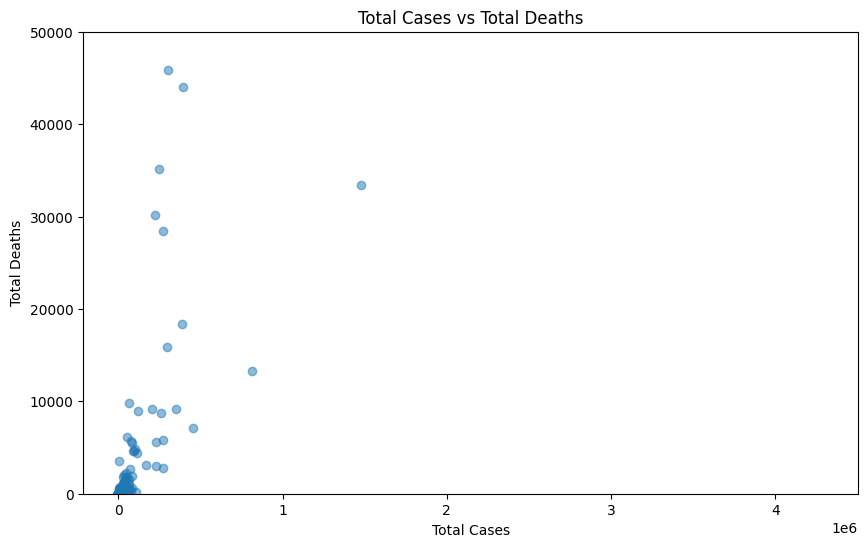

In [91]:
plt.figure(figsize=(10,6))
plt.scatter(df['Confirmed'], df['Deaths'], alpha=0.5)
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.title("Total Cases vs Total Deaths")
plt.ylim(0, 50000)
plt.show()

## 23. Save dataset in CSV format

In [85]:
df.to_csv('cleaned_covid_data.csv', index=False)